In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

# Load dataset 

In [2]:
path = R'/Users/shaquillelee/Documents/Specialization /Datasets'

In [3]:
weather_df = pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_cleaned.csv'), index_col = 0)
pleasant_df = pd.read_csv(os.path.join(path, 'Prepared Data', 'pleasant_cleaned.csv'), index_col = 0)

In [4]:
weather_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [5]:
weather_df.shape

(22950, 135)

In [6]:
pleasant_df.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
pleasant_df.shape

(22950, 15)

In [30]:
stations = {
    0: 'BASEL',
    1: 'BELGRADE',
    2: 'BUDAPEST',
    3: 'DEBILT',
    4: 'DUSSELDORF',
    5: 'HEATHROW',
    6: 'KASSEL',
    7: 'LJUBLJANA',
    8: 'MAASTRICHT',
    9: 'MADRID',
   10: 'MUNCHENB',
   11: 'OSLO',
   12: 'SONNBLICK',
   13: 'STOCKHOLM',
   14: 'VALENTIA',
}

In [21]:
# Select columns that start with 'BASEL'
basel_columns = weather_df.columns[weather_df.columns.astype(str).str.startswith('BASEL')]

# Create a new DataFrame with only those columns
basel_df = weather_df[basel_columns]


In [22]:
basel_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0


In [23]:
basel_df.shape

(22950, 9)

In [27]:
# Select columns that start with 'BASEL'
basel_column  = pleasant_df.columns[pleasant_df.columns.astype(str).str.startswith('BASEL')]

# Create a new DataFrame with only those columns
basel_pleasant = pleasant_df[basel_column]


In [28]:
basel_pleasant.head()

,BASEL_pleasant_weather
0,0
1,0
2,0
3,0
4,0


In [29]:
pleasant_df.shape

(22950, 1)

In [31]:
#Reshaping and modelling 
X = basel_df
y = basel_pleasant
print(X.shape)
print(y.shape)

(22950, 9)
(22950, 1)


In [36]:
# Create matrices
y1 = basel_pleasant.max(axis=1)

# Check shape
print("Shape of y1combined:", y1.shape)

Shape of y1combined: (22950,)


In [37]:
# Create X matrix
X1 = basel_df.to_numpy()

# Check shapes of the matrices
print(X1.shape)
print(y1.shape)

(22950, 9)
(22950,)


In [56]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)


In [57]:
# Check shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


In [60]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [61]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9997821350762527


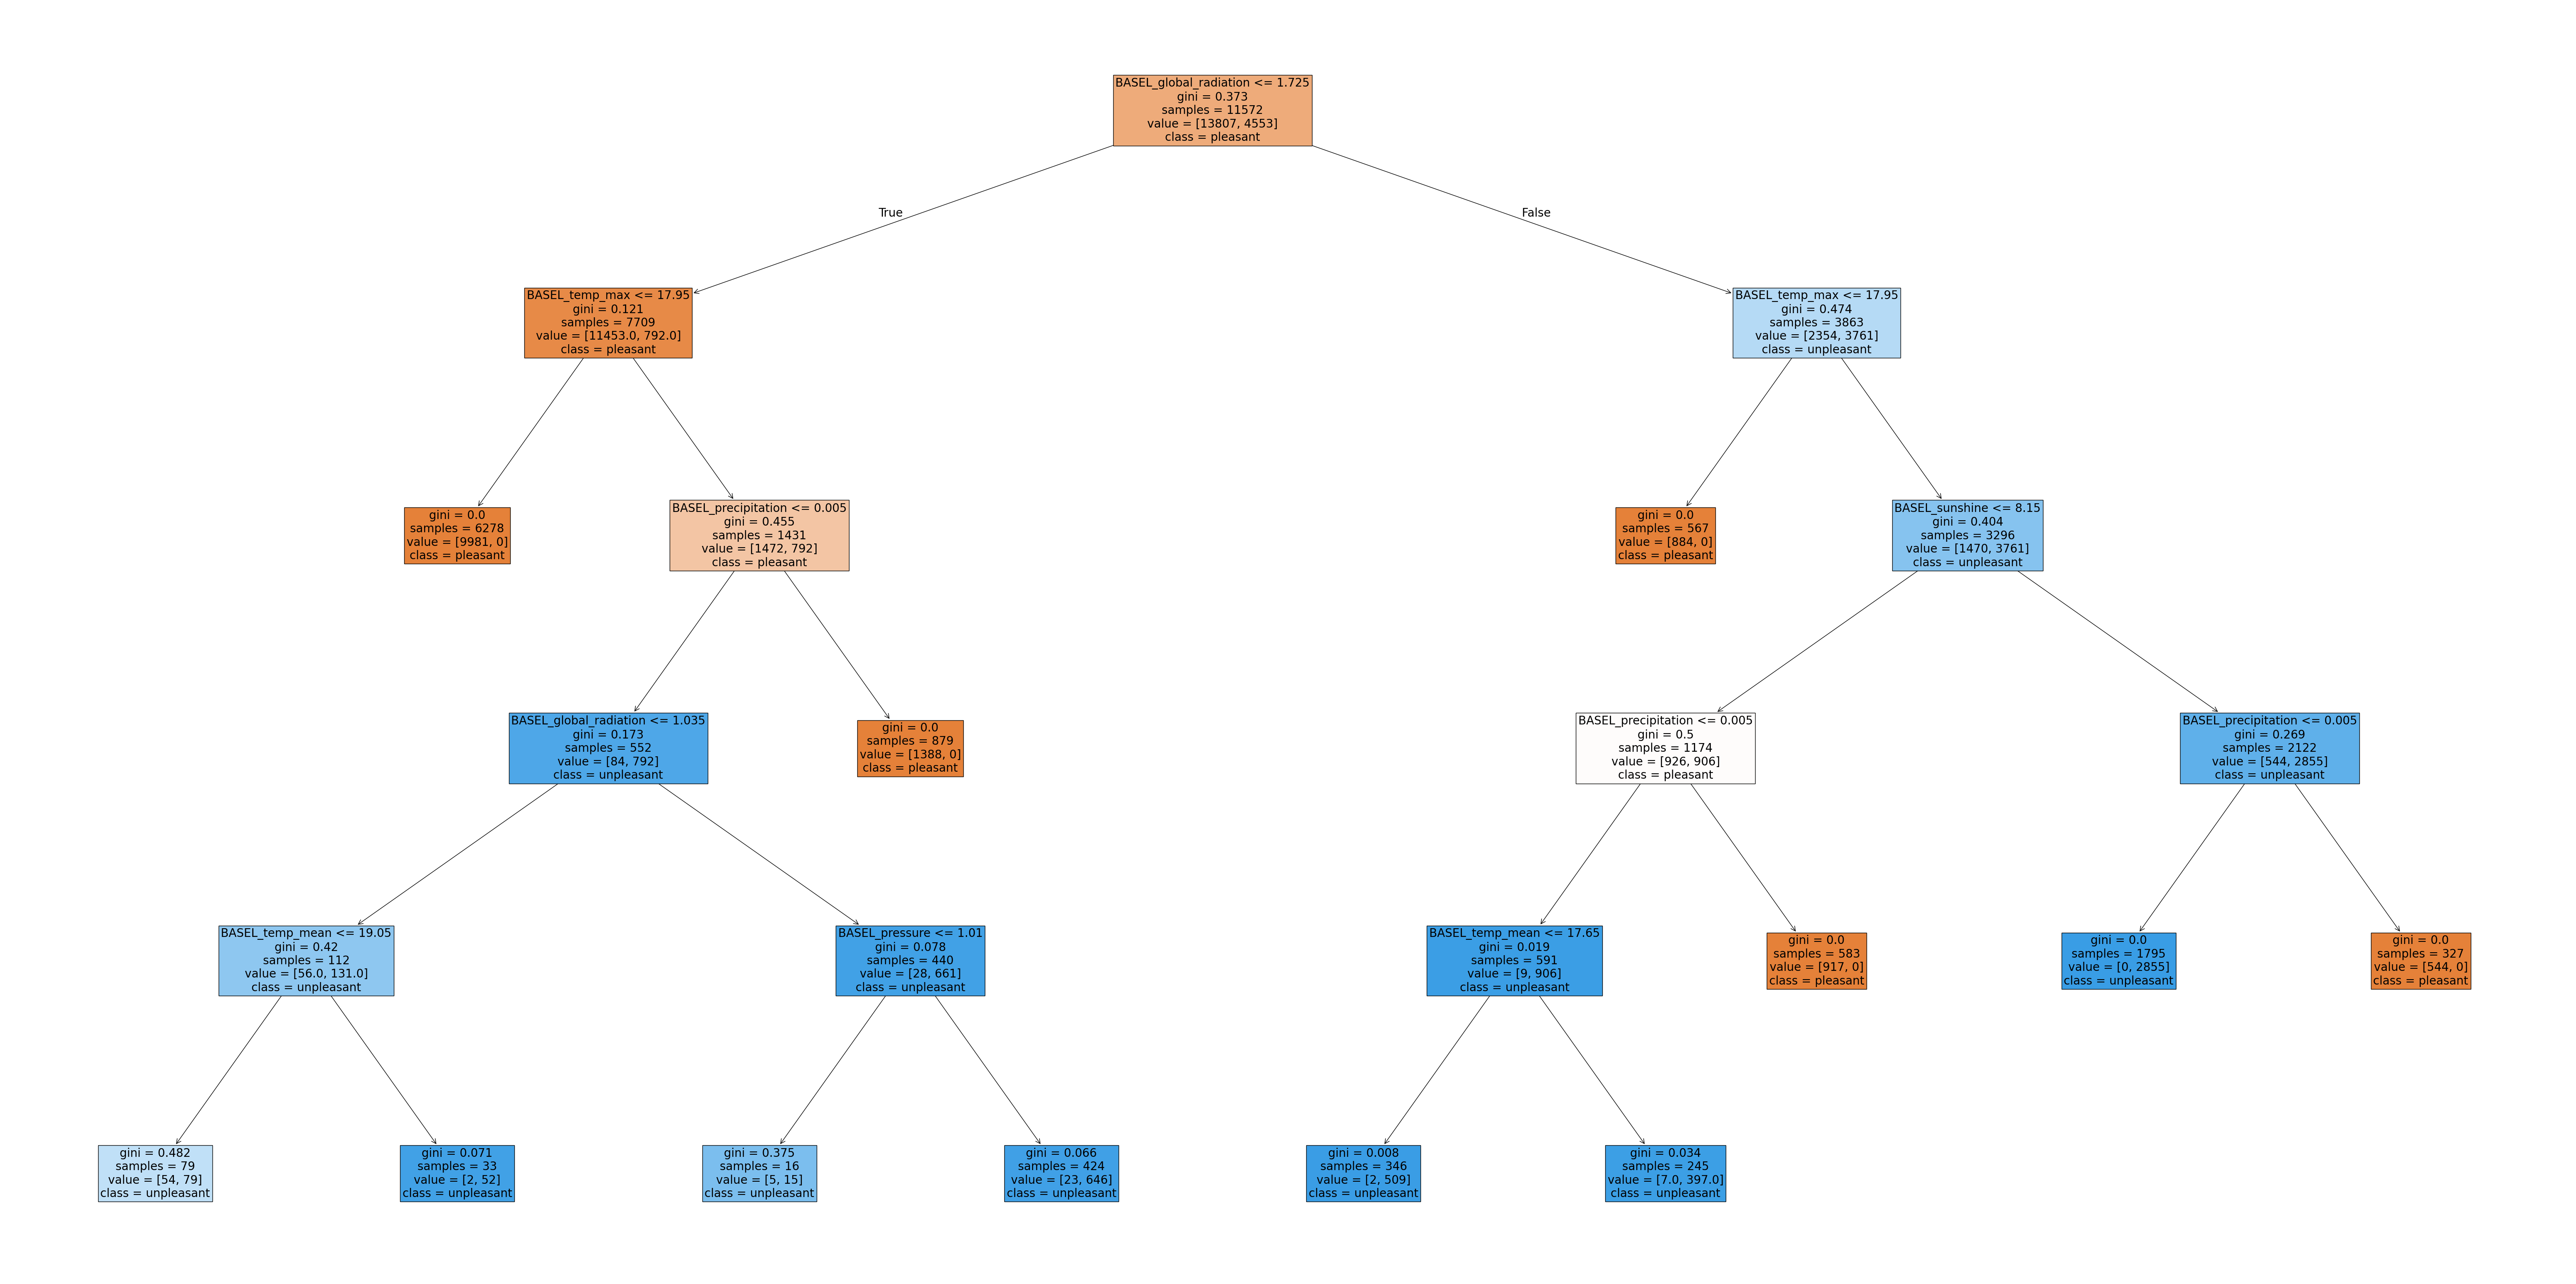

In [66]:
# Plot random forest for Basel
fig1 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[10], fontsize = 20, feature_names = basel_df.columns, class_names=['pleasant', "unpleasant"], filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [67]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.0206906 , 0.00810942, 0.00639528, 0.16323299, 0.32546164,
       0.11211166, 0.07728437, 0.02090085, 0.26581319])

In [68]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [70]:
# Create a dataframe to associate observation measurements with their importances
importances_df = pd.DataFrame({
    'Measurement': measurements,
    'Importance': newarray
})

In [72]:
# Sort by importance for chart readability
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df)

Feature Importance:
        Measurement  Importance
4     precipitation    0.325462
8          temp_max    0.265813
3  global_radiation    0.163233
5          sunshine    0.112112
6         temp_mean    0.077284
7          temp_min    0.020901
0       cloud_cover    0.020691
1          humidity    0.008109
2          pressure    0.006395


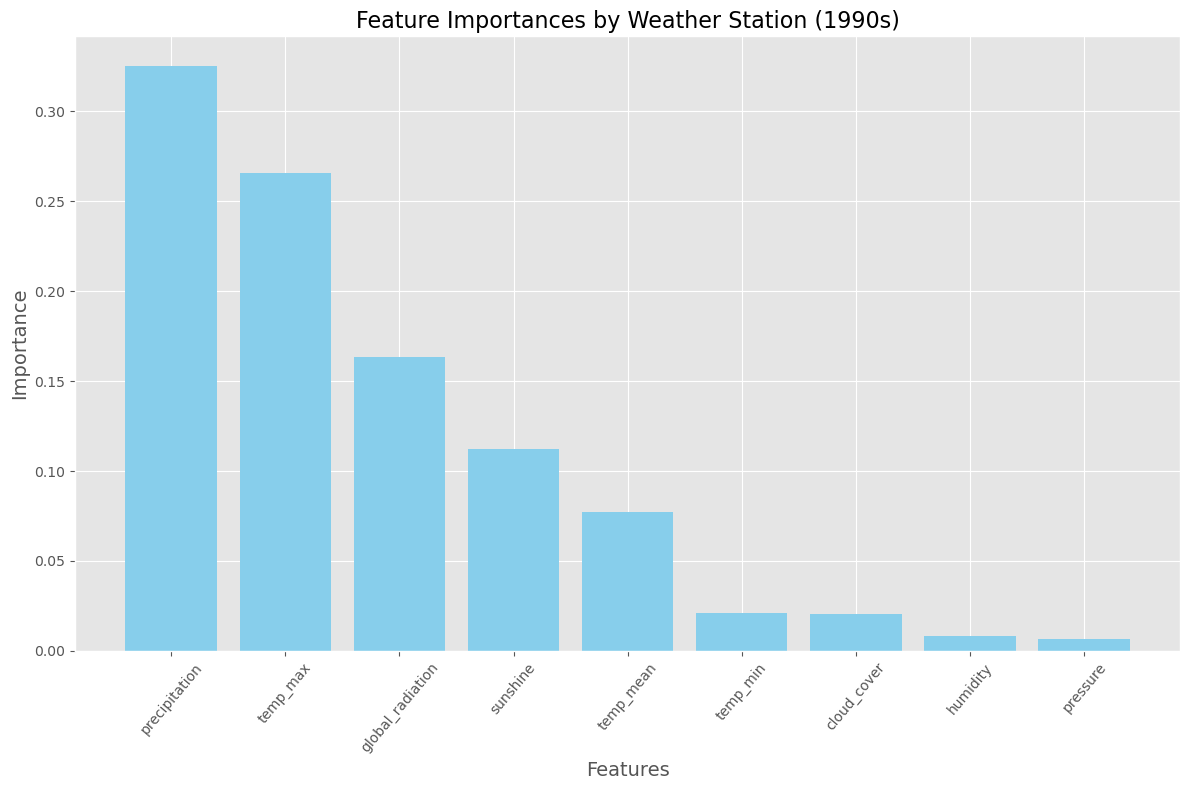

In [74]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(importances_df['Measurement'], importances_df['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (1990s)', fontsize=16)
plt.tight_layout()
plt.show()

Important indicators are Precipitation, temp_max and global radiation 